In [1]:
import tensorflow as tf

# Importing Libraries

In [3]:
!pip install nltk

In [4]:
!pip install --user charset_normalizer


In [5]:
!pip install --upgrade requests charset_normalizer transformers

  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl (100 kB)
  Attempting uninstall: charset_normalizer
    Found existing installation: charset-normalizer 2.0.4
    Uninstalling charset-normalizer-2.0.4:
      Successfully uninstalled charset-normalizer-2.0.4
  Rolling back uninstall of charset-normalizer
  Moving to c:\users\dell\anaconda3\envs\tensorflow\lib\site-packages\charset_normalizer-2.0.4.dist-info\
   from C:\Users\DELL\anaconda3\envs\tensorflow\Lib\site-packages\~harset_normalizer-2.0.4.dist-info
  Moving to c:\users\dell\anaconda3\envs\tensorflow\lib\site-packages\charset_normalizer\__init__.py
   from C:\Users\DELL\AppData\Local\Temp\pip-uninstall-9zryro16\__init__.py
  Moving to c:\users\dell\anaconda3\envs\tensorflow\lib\site-packages\charset_normalizer\__pycache__\__init__.cpython-310.pyc
   from C:\Users\DELL\AppData\Local\Temp\pip-uninstall-9zryro16\__pycache__\__init__.cp

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\envs\\tensorflow\\Lib\\site-packages\\charset_normalizer\\md.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D,LSTM, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_curve, auc
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from sklearn.metrics import accuracy_score

pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 100)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Loading Data

In [8]:
data = pd.read_csv("Dataset\\file.csv")
data = data.drop([data.columns[0]], axis=1)
data.values[:5].tolist()

[['ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI',
  'neutral'],
 ['Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr',
  'good'],
 ['ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34',
  'neutral'],
 ['THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71',
  'good'],
 ['As of 2 minutes ago, @OpenAI released their new ChatGPT. \\n\\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1',
  'bad']]

In [9]:
data.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral
1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good
2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; ...,neutral
3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad


# Plotting Graph

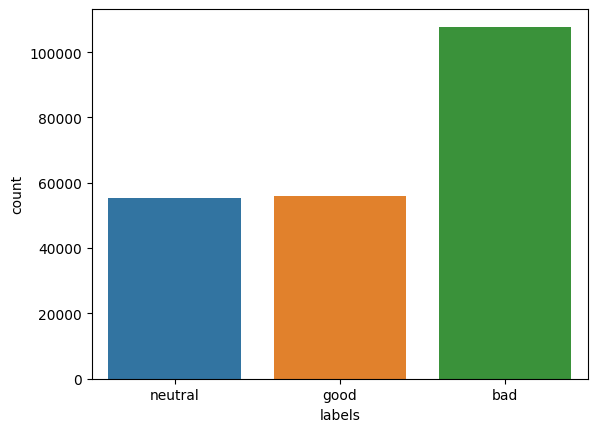

In [10]:
data['labels'].value_counts()
sns.countplot(data=data, x='labels')
plt.savefig('Images/BarChart.png')
plt.show()

<Axes: ylabel='count'>

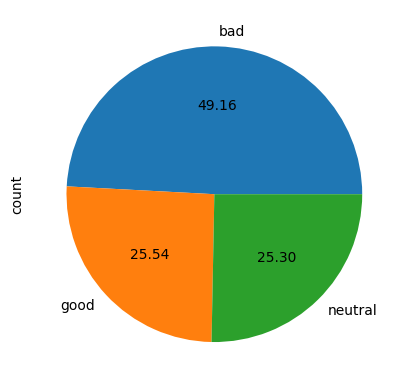

In [11]:
data['labels'] = data['labels'].astype(str)
data['labels'] = data['labels'].str.strip()
data['labels'].value_counts().plot(kind = 'pie', autopct = '%.2f')

# Word Cloud of data, before cleaning

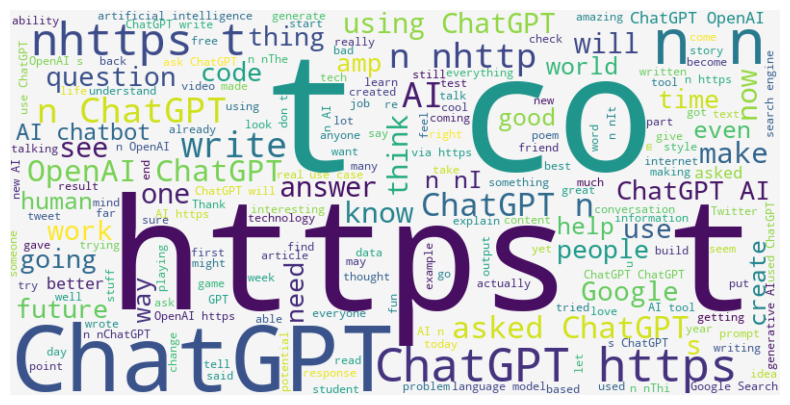

In [12]:
text_data = data['tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Images/WordCloudBeforeCleaning.png')
plt.show()


# Drop duplicated values

In [13]:
print("Duplicated values: " , data.duplicated().sum())

data.drop_duplicates(inplace=True)
data = data.dropna(axis=0)
print(data.info())

Duplicated values:  1671
<class 'pandas.core.frame.DataFrame'>
Index: 217623 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  217623 non-null  object
 1   labels  217623 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB
None


# Balance Data

In [14]:
data["labels"].value_counts()

labels
bad        106695
good        55754
neutral     55174
Name: count, dtype: int64

In [15]:
class_0 = data[data["labels"] == "neutral"]
class_1 = data[data["labels"] == "good"]
class_neg = data[data["labels"] == "bad"]
class_neg  = class_neg.iloc[:70000]
data = pd.concat([class_neg , class_0 , class_1])

data.head()

,tweets,labels
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad
6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,bad
17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",bad
39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,bad


In [16]:
data["labels"].value_counts()

labels
bad        70000
good       55754
neutral    55174
Name: count, dtype: int64

# Cleaning dataset

In [17]:
import nltk

In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False
    
    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]
    
    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) 
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    
    return text.strip()

data.insert(len(data.columns)-1, "cleaned_tweets", data['tweets'].apply(clean_dataset))
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,cleaned_tweets,labels
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,bad
6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,bad
10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,god damn stop announcing thing busy,bad
17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",model set become search engine future atm still struggle based,bad
39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,google done compare quality response chatgpt,bad


# Word Cloud of data, after cleaning

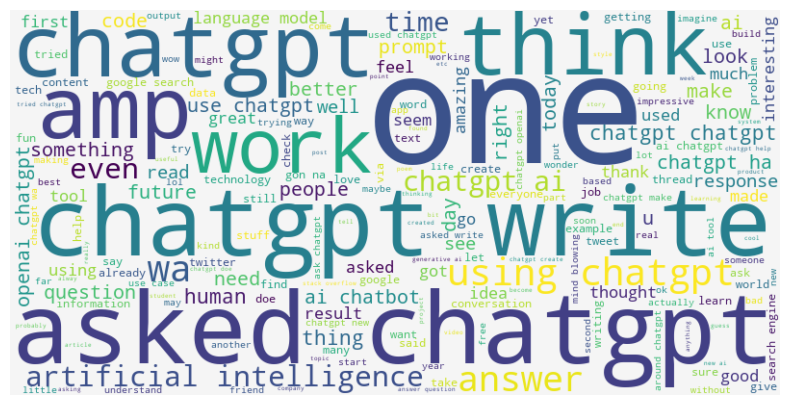

In [20]:
from wordcloud import WordCloud

text_data = data['cleaned_tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Images/WordCloudAfterCleaning.png')
plt.show()

# Converting dataset in numerical form

In [21]:
from numpy.core import numeric
import math
import collections

def convert_text_to_numerical(text):
    num_words = 7000
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
 
    #maxlen = max(45, math.ceil(np.average([len(seq) for seq in sequences])))
    maxlen = 140
    
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    pad_seqs_todrop = []
    for i, p in enumerate(pad_seqs):
        if sum(p) == sum(sorted(p, reverse=True)[0:2]):
            pad_seqs_todrop.append(i)

    return pad_seqs, pad_seqs_todrop, tokenizer, num_words, maxlen

data = data.reset_index()
numeric_tweets, rows_todrop, tokenizer, num_words, maxlen = convert_text_to_numerical(data['cleaned_tweets'])
data.insert(len(data.columns)-1, "numeric_tweets", numeric_tweets.tolist())
data.head()

,index,tweets,cleaned_tweets,numeric_tweets,labels
0,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
1,6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
3,17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",model set become search engine future atm still struggle based,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
4,39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad


# Encoding output labels

In [22]:
label_encoder = LabelEncoder()
# Delete the old column if it exists
old_column_name = 'encoded_labels'
if old_column_name in data.columns:
    data.drop(columns=[old_column_name], inplace=True)
data.insert(len(data.columns), "encoded_labels", label_encoder.fit_transform(data['labels']))
print(label_encoder.classes_)
data.head()

['bad' 'good' 'neutral']


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",model set become search engine future atm still struggle based,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [23]:
final_data = data.drop(rows_todrop, inplace=False)
print(len(data), len(final_data))
final_data.head()

180928 167734


,index,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I AM TOO BUSY https://t.co/F7Xd511FAf,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,"#ai Models are set to become the search engines of the future, ATM they still struggle with veracity… here is #chatgpt by @OpenAI based on #GPT3. #seo\n\nhttps://t.co/qqZ1G0fOTy",model set become search engine future atm still struggle based,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,Google is done.\n\nCompare the quality of these responses (ChatGPT) https://t.co/VGO7usvlIB,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


# Splitting Data: taining 80% and 20% for testing

In [24]:
inputs = final_data[['tweets', 'cleaned_tweets', 'numeric_tweets']]
outputs = final_data[['labels', 'encoded_labels']]

in_train, in_test, out_train, out_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=True, random_state=42)

X_train = in_train['numeric_tweets']
X_test = in_test['numeric_tweets'] 
y_train = out_train['encoded_labels']
y_test = out_test['encoded_labels']

# Saving training and testing data into csv files

In [27]:
#training_df = pd.concat([in_train, out_train], axis=1)
#training_df.to_csv('training_data.csv', encoding='utf-8', index=False)
#testing_df = pd.concat([in_test, out_test], axis=1)
#testing_df.to_csv('testing_data.csv', encoding='utf-8', index=False)

In [28]:
X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)
type(X_train)

numpy.ndarray

In [29]:
X_train

array([[   0,    0,    0, ...,  618,  106,  407],
       [   0,    0,    0, ...,   46,    2, 2489],
       [   0,    0,    0, ...,  949, 5749,   31],
       ...,
       [   0,    0,    0, ...,  104,  314,  178],
       [   0,    0,    0, ..., 1108, 1815,   20],
       [   0,    0,    0, ...,  195,  479,   46]])

# CNN Model

# Cnn training

In [30]:
from keras.callbacks import EarlyStopping
model1 = Sequential()
model1.add(Embedding(input_dim=num_words,output_dim=128, input_length=maxlen , trainable = True))

model1.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.1)])

Epoch 1/10
118/118 [==============================] - 22s 160ms/step - loss: 0.7347 - accuracy: 0.6692 - val_loss: 0.4561 - val_accuracy: 0.8392
Epoch 2/10
118/118 [==============================] - 18s 154ms/step - loss: 0.3909 - accuracy: 0.8704 - val_loss: 0.3653 - val_accuracy: 0.8838
Epoch 3/10
118/118 [==============================] - 18s 150ms/step - loss: 0.3224 - accuracy: 0.8987 - val_loss: 0.3432 - val_accuracy: 0.8893
Epoch 4/10
118/118 [==============================] - 16s 140ms/step - loss: 0.2903 - accuracy: 0.9105 - val_loss: 0.3376 - val_accuracy: 0.8918
Epoch 5/10
118/118 [==============================] - 17s 144ms/step - loss: 0.2601 - accuracy: 0.9216 - val_loss: 0.3422 - val_accuracy: 0.8853
Epoch 6/10
118/118 [==============================] - 17s 141ms/step - loss: 0.2285 - accuracy: 0.9331 - val_loss: 0.3576 - val_accuracy: 0.8848


# Cnn testing

In [31]:
def get_measurements(true_y, pred_y, average='micro'):
    return {
      "accuracy": accuracy_score(true_y, pred_y),
      "recall": recall_score(true_y, pred_y, average=average),
      "precision": precision_score(true_y, pred_y, average=average),
      "fscore": f1_score(true_y, pred_y, average=average),
  }
predicted_labels = model1.predict(X_test, verbose=1)
get_measurements(y_test,  np.argmax(predicted_labels, axis=1))

1049/1049 [==============================] - 6s 5ms/step


{'accuracy': 0.8841029004083822,
 'recall': 0.8841029004083822,
 'precision': 0.8841029004083822,
 'fscore': 0.8841029004083822}

# Cnn Prediction

In [32]:
def predict_user_input(tweets , model):
    data = pd.DataFrame({ 'Tweets': tweets })
    cleaned_data = data['Tweets'].apply(clean_dataset)
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    predicted_labels = model.predict(pad_seqs)
    data['labels'] = [ label_encoder.classes_[label_num] for label_num in np.argmax(predicted_labels, axis=1)]
    #print(data)
    return predicted_labels, data 


predict_user_input([
    'chatgpt is very crazy !', 
    'chatgpt is kind a dangerous', 
    'woooow, chatgt is really impressive !!!',
    "chatgpt is an AI tool",
    "good results"] , model1)

predict_user_input([
    "The worst result, I did not expect that unwanted results. it is a useless tool",
    "my name is ahmed i want to became a data scientist",
    'woooow, chatgt is really impressive i can not imagine how chatgpt generate solution like humans  ',
    "chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it",
    "good results when i use this tool i like it and it helped me and better than google"
] , model1)

1/1 [==============================] - 0s 77ms/step


(array([[9.99821603e-01, 5.03545052e-05, 1.28147454e-04],
        [2.43315607e-01, 1.34014385e-02, 7.43282914e-01],
        [6.11778523e-04, 9.98510659e-01, 8.77555809e-04],
        [9.10492335e-03, 7.95493364e-01, 1.95401654e-01],
        [3.18761508e-04, 9.94692624e-01, 4.98858048e-03]], dtype=float32),
                                                                                                            Tweets  \
 0                                  The worst result, I did not expect that unwanted results. it is a useless tool   
 1                                                              my name is ahmed i want to became a data scientist   
 2               woooow, chatgt is really impressive i can not imagine how chatgpt generate solution like humans     
 3  chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it   
 4                             good results when i use this tool i like it and it helped me and better 

In [33]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])

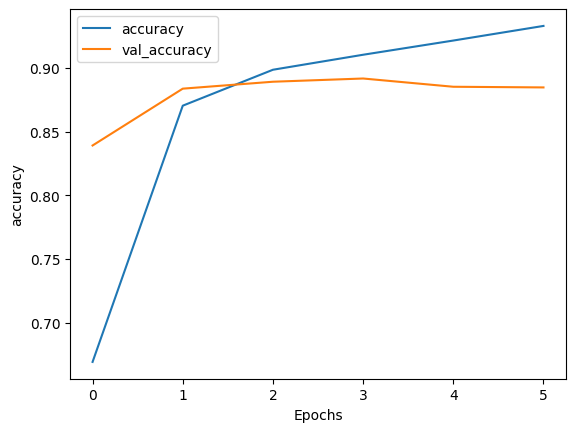

In [34]:
plot_graphs(history1, "accuracy")

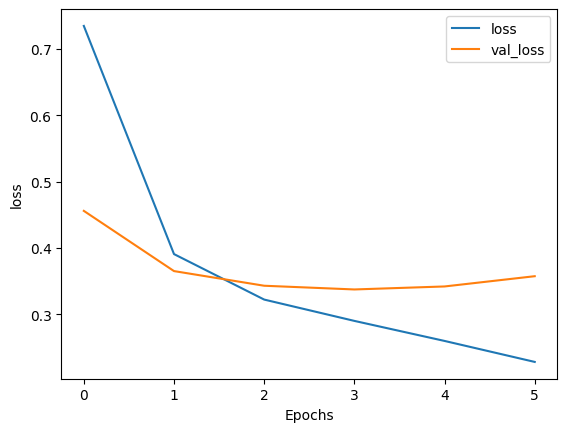

In [35]:
plot_graphs(history1, "loss")

In [36]:
def userIn(mo):
    x=input("enter sentence or x for exit: ")
    while x != "x":
        predict_user_input([x] , mo)
        x=input("enter sentence or x for exit: ")
        
userIn(model1)

enter sentence or x for exit:  x


# LSTM Model

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical


# Tokenize the input text
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(data["tweets"])


# Pad the sequences to a fixed length
max_len = 140

# word embeding

In [38]:
# Load pre-trained word embeddings
embedding_dim = 100
embeddings_index = {}
with open('C:\\Users\\DELL\\Tweets on ChatGPT Sentiment Analysis\\GloVe\\glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for the tokenizer
word_index = tokenizer.word_index
#num_words = min(len(word_index), 7000)
num_words =  7000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert the output labels to one-hot encoded vectors
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

# training model

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

# Create the model
model2 = Sequential()
model2.add(Embedding(num_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
model2.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model2.add(Dense(3, activation='softmax'))
#model2.add(Dense(3, activation='relu'))


# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model2.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=1024)
history2 = model2.fit(X_train, y_train_en, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])

Epoch 1/10
118/118 [==============================] - 518s 4s/step - loss: 0.9539 - accuracy: 0.5266 - val_loss: 0.7346 - val_accuracy: 0.6693
Epoch 2/10
118/118 [==============================] - 667s 6s/step - loss: 0.6533 - accuracy: 0.7226 - val_loss: 0.5009 - val_accuracy: 0.8065
Epoch 3/10
118/118 [==============================] - 494s 4s/step - loss: 0.4996 - accuracy: 0.8064 - val_loss: 0.4289 - val_accuracy: 0.8383
Epoch 4/10
118/118 [==============================] - 1506s 13s/step - loss: 0.4324 - accuracy: 0.8382 - val_loss: 0.3875 - val_accuracy: 0.8596
Epoch 5/10
118/118 [==============================] - 2022s 17s/step - loss: 0.3891 - accuracy: 0.8590 - val_loss: 0.3646 - val_accuracy: 0.8735
Epoch 6/10
118/118 [==============================] - 501s 4s/step - loss: 0.3597 - accuracy: 0.8730 - val_loss: 0.3468 - val_accuracy: 0.8815
Epoch 7/10
118/118 [==============================] - 329s 3s/step - loss: 0.3379 - accuracy: 0.8820 - val_loss: 0.3352 - val_accuracy: 0.

# testing

In [40]:
def get_measurements(true_y, pred_y, average='micro'):
    return {
      "accuracy": accuracy_score(true_y, pred_y),
      "recall": recall_score(true_y, pred_y, average=average),
      "precision": precision_score(true_y, pred_y, average=average),
      "fscore": f1_score(true_y, pred_y, average=average),
  }

predicted_labels = model2.predict(X_test, verbose=1)
get_measurements(y_test,  np.argmax(predicted_labels, axis=1))

1049/1049 [==============================] - 44s 41ms/step


{'accuracy': 0.8942677437624825,
 'recall': 0.8942677437624825,
 'precision': 0.8942677437624825,
 'fscore': 0.8942677437624825}

In [41]:
print(predict_user_input([
    'chatgpt is very crazy !', 
    'chatgpt is kind a dangerous', 
    'woooow, chatgt is really impressive !!!',
    "chatgpt is an AI tool",
    "good results"] , model2))

print("")

print(predict_user_input([
    "The worst result, I did not expect that unwanted results. it is a useless tool",
    "my name is ahmed i want to became a data scientist",
    'woooow, chatgpt is really impressive i can not imagine how chatgpt generate solution like humans  ',
    "chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it",
    "good results when i use this tool i like it and it helped me and better than google"
    ] , model2) )

print("finished")

1/1 [==============================] - 0s 69ms/step
(array([[0.00268923, 0.9659516 , 0.03135911],
       [0.985391  , 0.00381062, 0.01079834],
       [0.9793768 , 0.00405357, 0.01656962],
       [0.01463882, 0.00523516, 0.98012596],
       [0.9742019 , 0.00476   , 0.02103811]], dtype=float32),                                     Tweets   labels
0                  chatgpt is very crazy !     good
1              chatgpt is kind a dangerous      bad
2  woooow, chatgt is really impressive !!!      bad
3                    chatgpt is an AI tool  neutral
4                             good results      bad)

1/1 [==============================] - 0s 60ms/step
(array([[0.91187155, 0.0063653 , 0.08176322],
       [0.9871191 , 0.00173277, 0.01114818],
       [0.9750143 , 0.00298078, 0.02200491],
       [0.00109589, 0.98981756, 0.00908643],
       [0.97324115, 0.00388276, 0.0228761 ]], dtype=float32),                                                                                                 

In [42]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

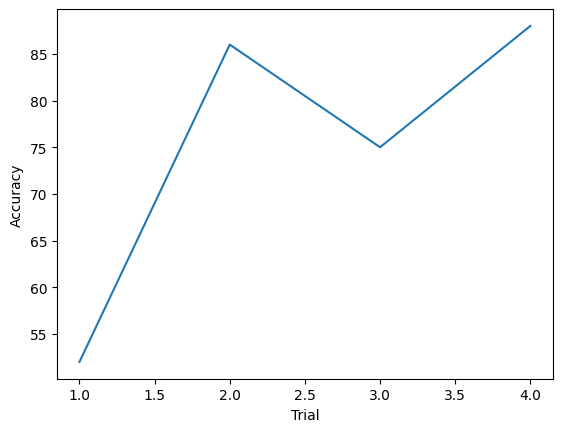

In [43]:
#x = [1 , 2 , 3 , 4]
x= np.array([1, 2 , 3 ,  4])
y = [52 , 86 , 75 , 88]
y= np.array([52 , 86 , 75 , 88])
#plt.plot(x)
plt.plot(x,y)

plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.savefig('Images/Trial&AccuracyGraph1.png')
plt.show()

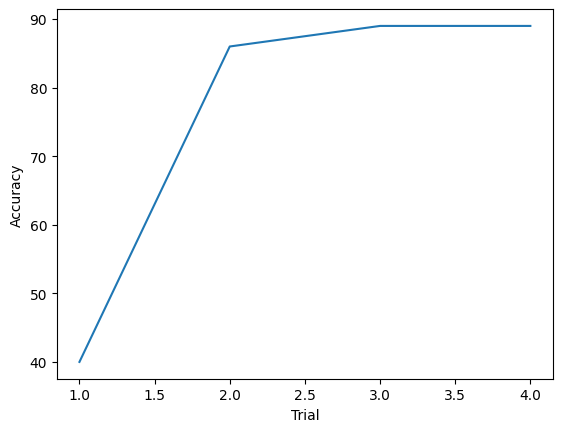

In [44]:
x = [1 , 2 , 3 , 4]
y = [40 ,  86  , 89, 89]
#plt.plot(x)
plt.plot(x,y)

plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.savefig('Images/Trial&AccuracyGraph2.png')
plt.show()

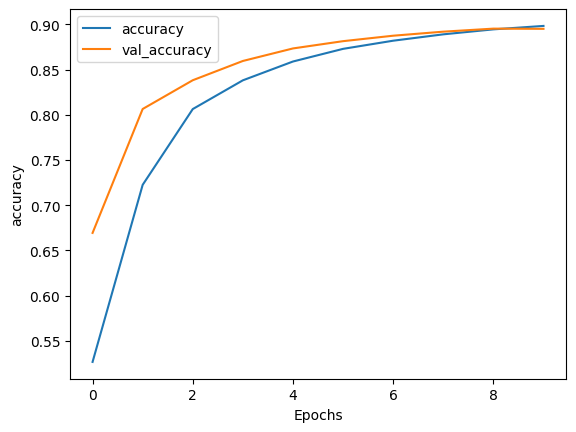

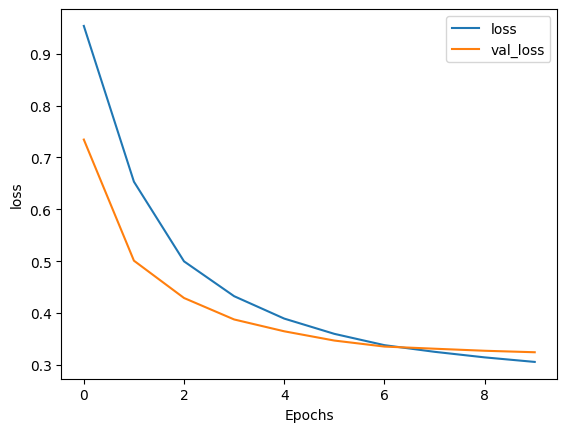

In [45]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")
plt.show()

In [46]:
def userIn(model):
    x=input("enter sentence or x for exit: ")
    while x != "x":
        predict_user_input([x] , model)
        x=input("enter sentence or x for exit: ")
        
userIn(model2)

enter sentence or x for exit:  x


# VADER Model Implementation

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [48]:
# Initialize an empty list for sentiment scores
sentiment_scores = []
# create a sentiment analyzer object
sia = SentimentIntensityAnalyzer()

In [49]:
data = pd.read_csv("Dataset\\file.csv")

In [50]:
text= "chatgpt is amazing tool"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}

In [51]:
# replace missing values with empty strings
data['tweets'] = data['tweets'].replace(np.nan, '', regex=True)

# iterate over the review text column and calculate the sentiment scores sentiment_scores = []
for text in data['tweets']: 
    scores = sia.polarity_scores(text) 
    sentiment_scores.append(scores['compound'])

#add the sentiment scores as a new column in the DataFrame
data['Sentiment Score'] = sentiment_scores

In [52]:
# define a function to map the compound scores to sentiment labels

def get_sentiment_label(score): 
    if score >= 0.05:
        return 'Good'
    elif score <= -0.05:
        return 'Bad'
    else:
        return "Neutral"

#apply the get sentiment label function to the sentiment scores to get the sentiment labels 
sentiment_labels = data['Sentiment Score'].apply(get_sentiment_label)

#add the sentiment labels as a new column in the DataFrame

data['Sentiment Label']= sentiment_labels

In [53]:
data.head(10)

,Unnamed: 0,tweets,labels,Sentiment Score,Sentiment Label
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,0.4588,Good
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,0.8225,Good
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; ...,neutral,0.4588,Good
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,0.9029,Good
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,0.0000,Neutral
5,5,"Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64",good,0.5423,Good
6,6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\n🤯 https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",bad,0.0000,Neutral
7,7,ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo. https://t.co/CVIJERbW38,good,0.6428,Good
8,8,"#0penAl just deployed a thing I've been helping build the last couple of months, it's a chatbot based on GPT 3. I'm really excited to share this vl\nhttps://t.co/zp7HniUxBu\nhttps://t.co/NISJLWhOMw",good,0.7474,Good
9,9,Research preview of our newest model: ChatGPT\n\nWe're trying something new with this preview: Free and immediately available for everyone (no waitlist!) https://t.co/0RDT7QNZRD,neutral,0.5562,Good


Text(0.5, 1.0, 'Sentiment Distribution')

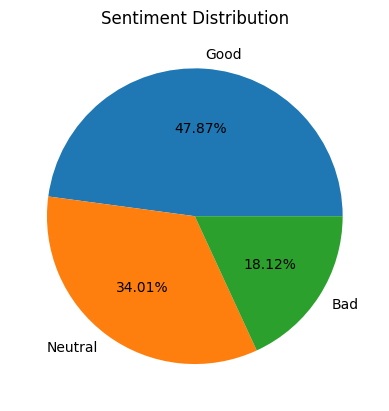

In [54]:
#count the number of reviews for each sentiment label 
sentiment_counts = data['Sentiment Label'].value_counts()
# create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%')
plt.title('Sentiment Distribution')